<a href="https://colab.research.google.com/github/Szyfman/MVP_PUC_ML_1/blob/main/MVP_PUC_Daniel_Szyfman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Introdução***

### **Definição do Problema:**

O naufrágio do Titanic é um dos desastres marítimos mais famosos da história, ocorrendo em 1912. Apesar da sua grandiosidade e da promessa de ser "inafundável", o Titanic enfrentou uma tragédia que resultou na morte de mais de 1.500 pessoas, deixando muitas perguntas sobre as circunstâncias que influenciaram a sobrevivência de seus passageiros. Identificar os fatores que contribuíram para a sobrevivência de algumas pessoas e não de outras pode fornecer insights valiosos sobre a interação de características demográficas, sociais e econômicas em situações de risco extremo.


**- Objetivo:**

Este projeto tem como objetivo desenvolver um modelo preditivo que, com base em dados dos passageiros do Titanic (como idade, sexo, classe social, etc.), seja capaz de prever se um indivíduo teria sobrevivido ou não à tragédia. Utilizando técnicas de machine learning, o modelo será treinado para reconhecer padrões nos dados e realizar previsões com base em características fornecidas.

**- Descrição do Problema:**

A sobrevivência no Titanic foi determinada por uma combinação de fatores, incluindo aspectos pessoais (como idade e sexo), posição social (classe de passagem) e circunstâncias do evento (acesso aos botes salva-vidas, proximidade às áreas de evacuação, etc.). A tarefa central deste projeto é encontrar um modelo que capture as relações entre essas variáveis e forneça previsões precisas sobre a sobrevivência de cada indivíduo.

**- Tipo de Problema:**

Este é um problema de classificação supervisionada. O objetivo é ensinar o modelo a associar características dos passageiros (atributos) a uma categoria binária a coluna Survived onde 1 indica que "Sobreviveu" e 0 que "Não Sobreviveu". O modelo será treinado usando um dataset histórico do Titanic, onde a sobrevivência de cada indivíduo é conhecida, caracterizando o caráter supervisionado do problema.

**- Premissas e Hipóteses:**

* **Premissa:**\
As características pessoais e sociais dos passageiros influenciaram diretamente suas chances de sobrevivência durante o desastre;\
O sexo e a idade, foram grandes fatores devido a frase "mulheres e crianças primeiro".

* **Hipótese:** Um modelo de machine learning pode identificar padrões nos dados históricos do Titanic e usá-los para prever com precisão a probabilidade de sobrevivência de novos indivíduos com base em características similares.

**- Restrições e Condições:**

* **Restrição:**
Os dados utilizados no projeto são limitados às informações contidas no dataset oficial do Titanic disponibilizado pelo Kaggle.

* **Condição:** O modelo será aplicado apenas a indivíduos cujas características estejam adequadamente representadas no dataset de treinamento.

**- Descrição do Dataset:**
O dataset utilizado no projeto contém informações detalhadas de 891 passageiros do Titanic, incluindo dados como:

* **Características pessoais:** Idade, sexo e número de familiares a bordo.

* **Características socioeconômicas:** Classe de viagem (1ª, 2ª ou 3ª) e preço pago pela passagem.

* **Variáveis de contexto:** Número da cabine e local de embarque.\
O atributo alvo é "Survived," que indica se o passageiro sobreviveu (1) ou não (0). O objetivo é treinar o modelo para identificar relações entre as variáveis explicativas e a sobrevivência, usando boas práticas de análise de dados e machine learning.

#***Pré-Processamento***

Começando o projeto MVP fazendo a importação das bibliotecas que serão utilizadas.

In [43]:
#IMPORTS

import pandas as pd
import os
import gdown
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

Verificando se o dataset foi carregado corretamente

In [44]:
#Criando uma pasta para o dataset
os.makedirs("dataset", exist_ok=True)

#ID do arquivo do Google Drive
file_id = "19VwekJyvY0-TgdldyigrkMFSYFpti3Ct"
output_path = "dataset/train.csv"

#Baixa o arquivo do Google Drive
gdown.download(f"https://drive.google.com/uc?id={file_id}", output_path, quiet=False)

print(f"Dataset baixado e salvo em: {output_path}")

Downloading...
From: https://drive.google.com/uc?id=19VwekJyvY0-TgdldyigrkMFSYFpti3Ct
To: /content/dataset/train.csv
100%|██████████| 61.2k/61.2k [00:00<00:00, 62.3MB/s]

Dataset baixado e salvo em: dataset/train.csv


In [45]:
df = pd.read_csv(output_path)

print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [ ]:
#Resumo do dataset
print(df.info())

#Estatísticas descritivas
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [ ]:
#Verifica quantos valores Nulos temos por atributo
print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Após identificar os valores ausentes, observamos:

Age: 177 valores ausentes.
Cabin: 687 valores ausentes (alta proporção, mais de 75% do dataset).
Embarked: 2 valores ausentes.\
Agora, vamos tratar cada caso detalhadamente:

**1. Coluna Age:**\
Possui muitos valores ausentes.\
**Decisão**: Substituir valores ausentes pela mediana da idade, pois é menos sensível a outliers do que a média.

**2. Coluna Cabin:**\
Possui mais valores nulos do que informações relevantes, o que reduz sua utilidade.\
**Decisão:** Excluir essa coluna, pois preencher com suposições não agregaria muito valor ao modelo.

**3. Coluna Embarked:**\
Apenas dois valores ausentes.\
**Solução:** Substituir pela moda (porto mais comum).

In [46]:
#Substitui todos os valores NaN (ausentes) na coluna Age pela mediana calculada de todas as idades presentes.
df['Age'] = df['Age'].fillna(df['Age'].median())

#Como Cabin possui muitos valores ausentes, optamos por removê-la completamente.
df.drop(columns=['Cabin'], inplace=True)

#Preenchemos os valores ausentes de Embarked com a moda (valor mais frequente)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [47]:
#Verifica se a correção dos valores Nulos foi bem sucedida
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


Com os valores nulos tratados, vamos fazer a conversão de variáveis categóricas.

Sexo é uma variável categórica binária (masculino/feminino). Essa informação é crucial para o modelo, já que acreditamos que o gênero influenciou a probabilidade de sobrevivência.

O porto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton) pode ser relevante, já que passageiros de diferentes portos podem ter tido diferentes condições de viagem.\
Usaremos One-Hot Encoding, criando uma coluna para cada valor (C, Q, S). Para evitar criar uma hierarquia falsa.

In [48]:
#Convertendo Sexo em 0 para masculino e 1 para feminino
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

#Criando uma coluna para cada porto
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')
df = pd.concat([df, embarked_dummies], axis=1)
df.drop('Embarked', axis=1, inplace=True)


Convertidas as variáveis categóricas, vamos realizar o feature engineering:

* Criar a variável FamilySize:\
O tamanho da família pode influenciar a probabilidade de sobrevivência. Pessoas com famílias maiores podem ter enfrentado dificuldades em evacuar, enquanto pessoas sozinhas podem ter tido menos dependentes para ajudar.Para isso vamos somar as colunas SibSp (irmãos/cônjuges a bordo) e Parch (pais/filhos a bordo), adicionando 1 para incluir o próprio passageiro.

* Criar variável IsAlone:\
 Embora FamilySize == 1 claramente indique que o passageiro estava sozinho, criar uma variável explícita como IsAlone torna o dataset mais intuitivo e fácil de interpretar.

* Extrair o título dos nomes (Title):\
 Os nomes dos passageiros contêm títulos (como Mme., Mr., Miss) que indicam status social, gênero ou até idade. Isso pode estar correlacionado à probabilidade de sobrevivência.\
Vamos extrair o título de cada nome usando expressões regulares, criando duas categorias, 1 para títulos comuns, que aparecem mais de 10 vezes e 0 para os que aparecem menos. Pois a raridade do título pode indicar um status mais elevado.


In [49]:
#Criando Family Size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

#Criando IsAlone
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

#Extrair Título dos nomes
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Extrair os títulos dos nomes
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Criar a variável binária: 1 para comuns, 0 para raros
title_counts = df['Title'].value_counts()
df['Title'] = df['Title'].apply(lambda x: 1 if title_counts[x] > 10 else 0)


Testando se as novas colunas foram cosntruídas corretamente.

In [50]:
df[['SibSp', 'Parch', 'FamilySize', 'IsAlone', 'Title']].head()

,SibSp,Parch,FamilySize,IsAlone,Title
0,1,0,2,0,1
1,1,0,2,0,1
2,0,0,1,1,1
3,1,0,2,0,1
4,0,0,1,1,1


Agora vamos normalizar as colunas Age e Fare utilizando o método Min-Max Scaling. Esse método é simples, preserva a ordem dos dados e garante sua consistência para modelos que possamos usar no futuro que dependam de normalização.

In [51]:
#Definindo a escala como sendo de 0 a 1
scaler = MinMaxScaler()

#Selecionando as colunas que serão escalonadas
numeric_columns = ['Age', 'Fare']

#Aplicando o escalonamento
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [52]:
#Verificando
df[['Age', 'Fare']].describe()

,Age,Fare
count,891.000000,891.000000
mean,0.363679,0.062858
std,0.163605,0.096995
min,0.000000,0.000000
25%,0.271174,0.015440
50%,0.346569,0.028213
75%,0.434531,0.060508
max,1.000000,1.000000


Verificado que os valores de Age e Fare foram normalizados. Agora vamos concluir a etapa de pré-processamento de dados, eliminado outliers dessas colunas que foram escaladas que podem atrapalhar no aprendizado do algoritmo.\
Para isso, utilizaremos o método IQR.

In [53]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

outliers_age = detect_outliers_iqr(df, 'Age')
outliers_fare = detect_outliers_iqr(df, 'Fare')

#Mostrar os outliers
print("Outliers em 'Age':", outliers_age)
print("Outliers em 'Fare':", outliers_fare)


Outliers em 'Age':      PassengerId  Survived  Pclass  \
7              8         0       3   
11            12         1       1   
15            16         1       2   
16            17         0       3   
33            34         0       2   
..           ...       ...     ...   
827          828         1       2   
829          830         1       1   
831          832         1       2   
851          852         0       3   
879          880         1       1   

                                              Name  Sex       Age  SibSp  \
7                   Palsson, Master. Gosta Leonard    0  0.019854      3   
11                        Bonnell, Miss. Elizabeth    1  0.723549      0   
15                Hewlett, Mrs. (Mary D Kingcome)     1  0.685851      0   
16                            Rice, Master. Eugene    0  0.019854      4   
33                           Wheadon, Mr. Edward H    0  0.824076      0   
..                                             ...  ...       ...   

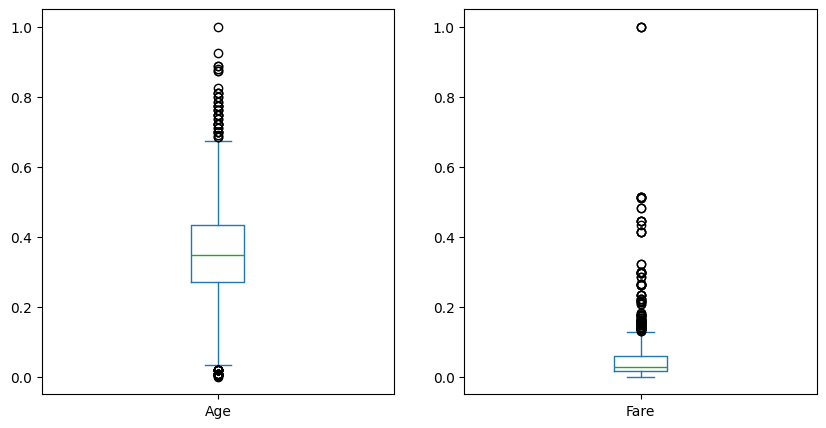

In [54]:
#Criar boxplots para 'Age' e 'Fare'
df[['Age', 'Fare']].plot(kind='box', subplots=True, layout=(1, 2), figsize=(10, 5))
plt.show()


Para Age não faremos transformação, visto que, a distribuição dos valores está adequada. Os poucos outliers encontrados, representam idades muito jovens ou muito velhos, informação que creio ser fundamental na análise da chance de sobrevivência de um indivíduo.\
Na coluna Fare, aplicaremos uma transformação logarítma, isso reduzirá a influência dos vários valores extremos que foram encontrados sem descartar informações úteis. Acredito que essas informações serão importantes para obter diferenças dentro de uma mesma classe.

In [55]:
#Aplicar transformação logarítmica
df['Fare'] = np.log1p(df['Fare'])

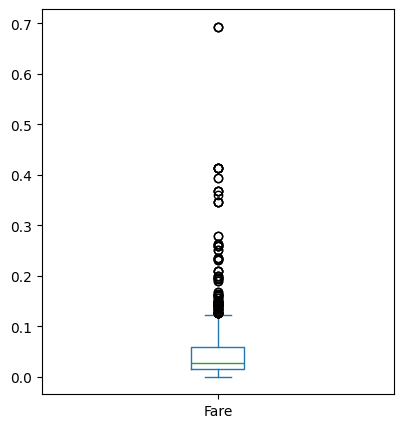

In [56]:
#Revisando 'Fare'
df['Fare'].plot(kind='box', subplots=True, layout=(1, 2), figsize=(10, 5))
plt.show()

Terminado o tratamento dos outliers, podemos agora preparar os dados para a modelagem.

#***Preparação para Modelagem***

Com os dados pré-processados, iremos agora realizar o feature selection, escolhendo quais colunas utilizar no modelo, para reduzir a complexidade e focar apenas nas informações úteis.\
Vamos ver o resultado do pré-processamento:

In [57]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex       Age  SibSp  \
0                            Braund, Mr. Owen Harris    0  0.271174      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  0.472229      1   
2                             Heikkinen, Miss. Laina    1  0.321438      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  0.434531      1   
4                           Allen, Mr. William Henry    0  0.434531      0   

   Parch            Ticket      Fare  Embarked_C  Embarked_Q  Embarked_S  \
0      0         A/5 21171  0.014052       False       False        True   
1      0          PC 17599  0.130270        True       False       False   
2      0  STON/O2. 3101282  0.015350       False       False        True   
3      0  

Agora iremos ver a correlação das colunas de atributo com o resultado da coluna Survived.

Survived       1.000000
Sex            0.543351
Fare           0.274425
Embarked_C     0.168240
Parch          0.081629
FamilySize     0.016639
Embarked_Q     0.003650
PassengerId   -0.005007
Title         -0.022030
SibSp         -0.035322
Age           -0.064910
Embarked_S    -0.149683
IsAlone       -0.203367
Pclass        -0.338481
Name: Survived, dtype: float64


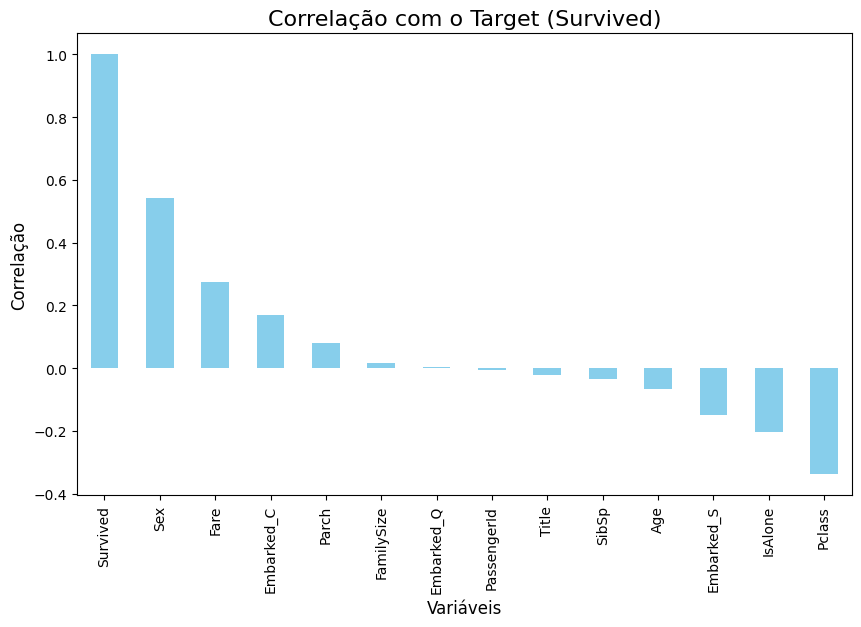

In [58]:
#Calculando correlação
correlation_matrix = df.corr(numeric_only=True)
correlation_with_target = correlation_matrix['Survived'].sort_values(ascending=False)
print(correlation_with_target)

#Criando gráfico de barras
correlation_with_target.plot(kind='bar', figsize=(10, 6), color='skyblue')

#Adicionar legenda
plt.title('Correlação com o Target (Survived)', fontsize=16)
plt.xlabel('Variáveis', fontsize=12)
plt.ylabel('Correlação', fontsize=12)

#Exibir o gráfico
plt.show()

Podemos perceber que Sex é a coluna mais diretamente correlacionada com Survived. Favorecendo as mulheres, já que male=0 e female=1 foi definido anteriormente. Já em relação a idade, a diferença não foi tão significativa, mas mostra que pessoas mais novas tiveram mais chance de sobreviver. Esses resultados eram esperados, visto a famosa frase "mulheres e crianças primeiro".

#***Treinamento de um Modelo Inicial***

Removeremos as colunas que apresentaram correlação relativa próxima de 0, FamilySize, Embarked_Q, PassengerId, Title e SibSp e manteremos as outras com correlação positiva.\
Vamos testar vários modelos regressão logística, Gradient Boosting, K-vizinhos mais próximos (KNN), SVM e Random Forest.
Aplicando o cross validation em cada um deles para ter uma avaliação mais confiável. Vamos fazer isso para garantir a consistência dos resultados. Isso ajuda a evitar viés e reduz o impacto de outliers ou desequilíbrios em subconjuntos específicos.

In [61]:
X = df[['Sex', 'Fare', 'Embarked_C',  'Parch', 'Age', 'Embarked_S', 'IsAlone', 'Pclass']]
y = df['Survived']

# Divisão 80% treinamento e 20% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Instaciaremos vários modelos

In [62]:
# Dicionário de modelos
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(random_state=42),
    "Random Forest Classifier": RandomForestClassifier(random_state=42),
}

# Avaliar cada modelo utilizando cross validation
results = {}
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=7, scoring='accuracy')
    results[model_name] = (cv_scores.mean(), cv_scores.std())

# Treinar o modelo e fazer previsões
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

# Mostrar resultados
for model, (mean_score, std_score) in results.items():
    print(f"{model}: Mean Accuracy = {mean_score:.2f}, Std = {std_score:.2f}")
    print(classification_report(y_test, y_pred))

Logistic Regression: Mean Accuracy = 0.79, Std = 0.06
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Gradient Boosting: Mean Accuracy = 0.81, Std = 0.05
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

K-Nearest Neighbors: Mean Accuracy = 0.78, Std = 0.05
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy          

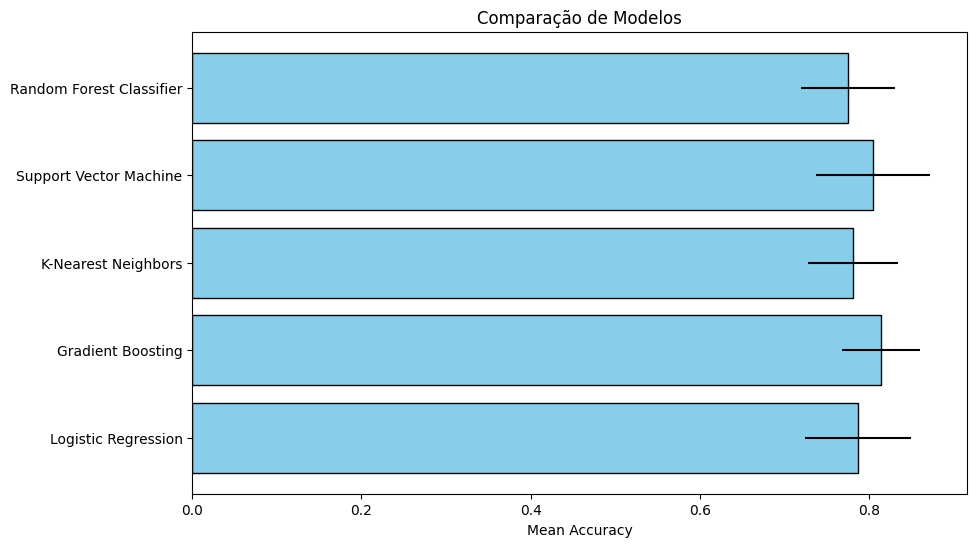

In [63]:
# Preparar dados para o gráfico
model_names = list(results.keys())
mean_scores = [results[model][0] for model in model_names]
std_scores = [results[model][1] for model in model_names]

# Gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(model_names, mean_scores, xerr=std_scores, color='skyblue', edgecolor='black')
plt.xlabel("Mean Accuracy")
plt.title("Comparação de Modelos")
plt.show()

De acordo com os resultados, todos os modelos apresentaram uma acurácia semelhante, mas o Gradient Boosting se destaca por apresentar menor desvio padrão (Std), logo, utilizaremos ele para realizar o teste.

#***Otimizando o Modelo***

Agora vamos tentar otimizar o modelo, mudando seus hiperparâmetros. Vamos usar o Grid Search como estratégia, que utiliza a validação cruzada para avaliar folds diferentes do conjunto de treinamento

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Definir o modelo
gb_model = GradientBoostingClassifier(random_state=42)

# Definir a grade de hiperparâmetros
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
}

# Configurar o Grid Search
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=7, scoring='accuracy', verbose=2, n_jobs=-1)

# Realizar o Grid Search
grid_search.fit(X_train, y_train)

# Melhor combinação de hiperparâmetros
print("Melhores hiperparâmetros:", grid_search.best_params_)
print("Melhor acurácia:", grid_search.best_score_)


Fitting 7 folds for each of 576 candidates, totalling 4032 fits
Melhores hiperparâmetros: {'learning_rate': 0.01, 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 300}
Melhor acurácia: 0.8301023379648889


Com os melhores hiperparâmetros definidos, vamos treinar novamente o modelo.

In [70]:
# Treinar o modelo final com os melhores hiperparâmetros
final_model = GradientBoostingClassifier(
    learning_rate=0.01,
    max_depth=6,
    min_samples_leaf=3,
    min_samples_split=10,
    n_estimators=300,
    random_state=42
)
final_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=6, min_samples_leaf=3,
                           min_samples_split=10, n_estimators=300,
                           random_state=42)

#***Análise do Modelo***

Agora vamos avaliar o modelo com os hiperparâmetros otimizados

In [71]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Prever no conjunto de teste
y_test_pred = final_model.predict(X_test)

# Avaliar o desempenho
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Acurácia no conjunto de teste: {test_accuracy:.2f}")

# Relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_test_pred))

# Matriz de confusão
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_test_pred))

Acurácia no conjunto de teste: 0.81
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.83      0.68      0.75        74

    accuracy                           0.81       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179

Matriz de Confusão:
[[95 10]
 [24 50]]


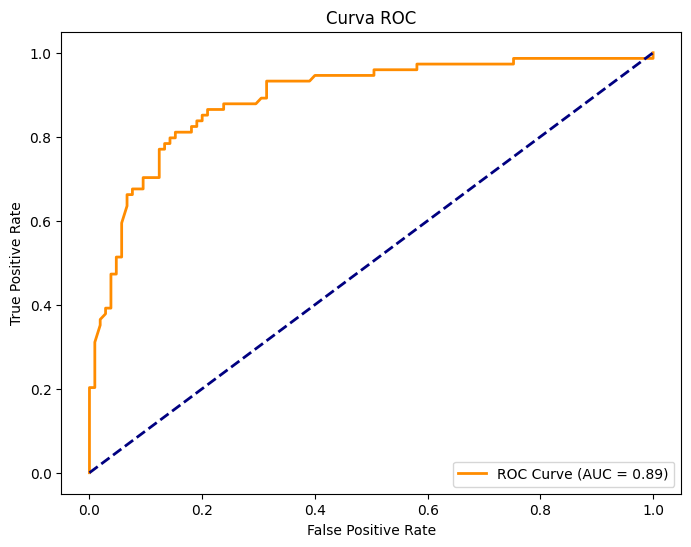

In [72]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcular probabilidades para a curva ROC
y_test_proba = final_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()

Continuar análise

#***Conclusão***

Desenvolver conclusão